<a href="https://colab.research.google.com/github/Dhairyakumarshah/Strawberry_disease/blob/main/STRAWBERRY_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Importing the libraries
import pandas as pd
import numpy as  np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
from IPython.display import HTML

In [3]:
# Path to your dataset
dataset_path = r"/content/drive/MyDrive/Cherry"

In [4]:
import tensorflow as tf

# Define constants
IMAGE_SIZE = 224
BATCH_SIZE = 32
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
# Check the class names
print(dataset.class_names)

Found 2109 files belonging to 2 classes.
['Strawberry___Leaf_scorch', 'Strawberry___healthy']


In [6]:
required_classes = ['Strawberry___Leaf_scorch', 'Strawberry___healthy']

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    label_mode='int',  # Ensure that labels are integers
    class_names=required_classes  # Restrict to the required classes
)

# Print the classes to verify
print(f"Loaded classes: {dataset.class_names}")

Found 2109 files belonging to 2 classes.
Loaded classes: ['Strawberry___Leaf_scorch', 'Strawberry___healthy']


In [8]:
for image_batch, lable_batch in dataset.take(1):
    print(image_batch.shape)
    print(lable_batch.numpy())

(32, 224, 224, 3)
[1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0]


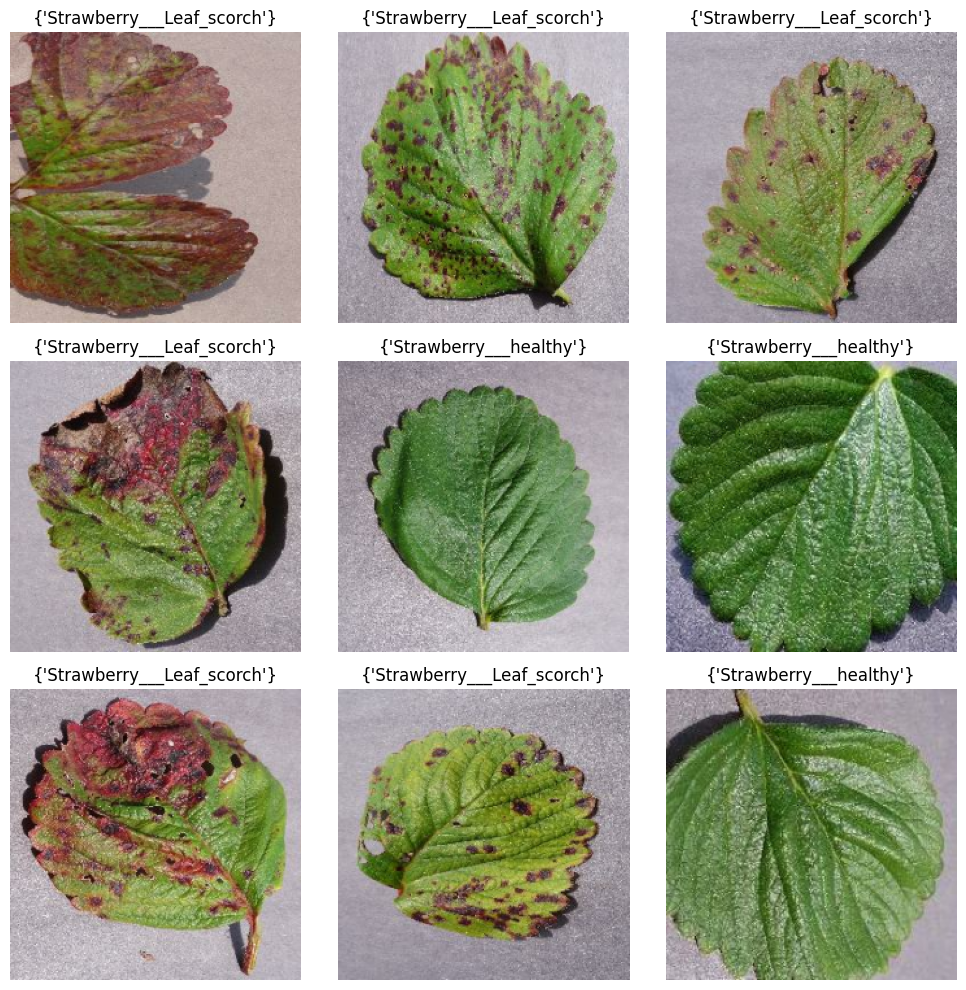

In [9]:
# Get the class names from the dataset
class_names = dataset.class_names

# Take one batch of images and labels
for image_batch, label_batch in dataset.take(1):
    # Create a figure with a 3x3 grid
    plt.figure(figsize=(10, 10))

    for i in range(9):  # Display the first 9 images
        plt.subplot(3, 3, i + 1)  # 3x3 grid
        plt.imshow(image_batch[i].numpy().astype("uint8"))  # Convert to uint8 for display
        class_name = class_names[label_batch[i].numpy()]  # Get the class name
        plt.title({class_name})  # Show the exact class name as the title
        plt.axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlapping of subplots
    plt.show()


In [10]:
# Split the dataset into training and validation sets
train_size = 0.8
train_dataset = dataset.take(int(len(dataset) * train_size))
val_dataset = dataset.skip(int(len(dataset) * train_size))

In [11]:
# Normalize the data (rescale pixel values between 0 and 1)
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

We will check the image size

Healthy images: ['image (11).JPG', 'image (110).JPG', 'image (112).JPG', 'image (116).JPG', 'image (115).JPG']
Leaf scorch images: ['image (1078).JPG', 'image (1100).JPG', 'image (108).JPG', 'image (109).JPG', 'image (110).JPG']
Image shape: (256, 256, 3)


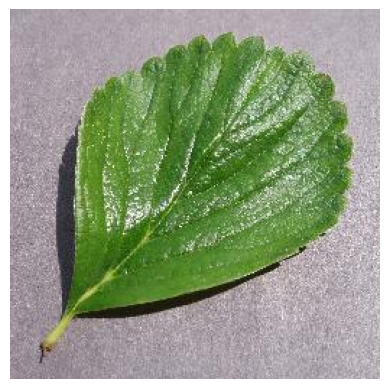

In [12]:
import os
import matplotlib.pyplot as plt

# Define the path to the directories
healthy_dir = '/content/drive/MyDrive/Cherry/Strawberry___healthy'
scorch_dir = '/content/drive/MyDrive/Cherry/Strawberry___Leaf_scorch'

# List all files in the healthy directory
healthy_images = os.listdir(healthy_dir)
scorch_images = os.listdir(scorch_dir)

# Print the first few files to see what images are available
print("Healthy images:", healthy_images[:5])
print("Leaf scorch images:", scorch_images[:5])

# Load and display one image (replace 'example_image.jpg' with an actual file from the list)
image_path = os.path.join(healthy_dir, healthy_images[0])  # Load the first image in the healthy folder
image = plt.imread(image_path)

# Show the image shape and display it
print(f"Image shape: {image.shape}")
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()


In [27]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

IMAGE_SIZE = 224  # Adjust the image size to match your input images
CHANNELS = 3      # RGB channels

# Recreate the model with the updated IMAGE_SIZE
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# View the model summary
model.summary()

# 'train_dataset' and 'val_dataset' are already defined and preprocessed with images resized to 224x224
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 210s 4s/step - accuracy: 0.5710 - loss: 1.0726 - val_accuracy: 0.9506 - val_loss: 0.1110
Epoch 2/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 66s 210ms/step - accuracy: 0.9171 - loss: 0.2226 - val_accuracy: 0.9753 - val_loss: 0.0520
Epoch 3/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 324ms/step - accuracy: 0.9841 - loss: 0.0452 - val_accuracy: 0.9978 - val_loss: 0.0163
Epoch 4/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 311ms/step - accuracy: 0.9804 - loss: 0.0517 - val_accuracy: 0.9843 - val_loss: 0.0642
Epoch 5/5
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 232ms/step - accuracy: 0.9731 - loss: 0.0556 - val_accuracy: 0.9978 - val_loss: 0.0081


Text(0.5, 1.0, 'Accuracy')

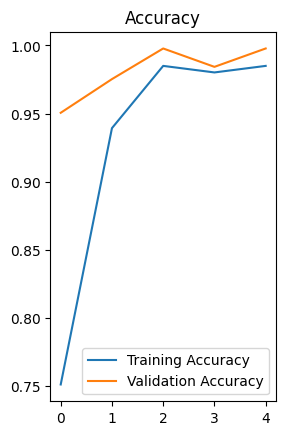

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

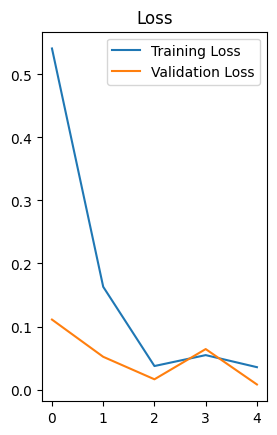

In [34]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [35]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 1.0000 - loss: 0.0042
Validation Accuracy: 100.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step
Predicted Class: Strawberry___healthy


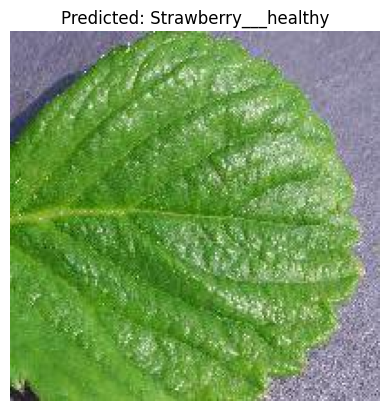

In [36]:
import os
import random
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize the image (as done during training)
    return img_array

# Select a random class folder and then a random image within that folder
random_class = random.choice(required_classes)  # Pick a random class
class_folder = os.path.join(dataset_path, random_class)  # Full path to the class folder
random_image = random.choice(os.listdir(class_folder))  # Pick a random image file

# Full path to the random image
img_path = os.path.join(class_folder, random_image)

# Load and preprocess the random image
img = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = required_classes[predicted_class_index]

# Print the prediction
print(f"Predicted Class: {predicted_class_name}")

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {predicted_class_name}")
plt.axis('off')
plt.show()


TOO SEE PREDICTED BOTH IMAGES

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Class for Healthy Image: Strawberry___healthy
Predicted Class for Diseased Image: Strawberry___Leaf_scorch


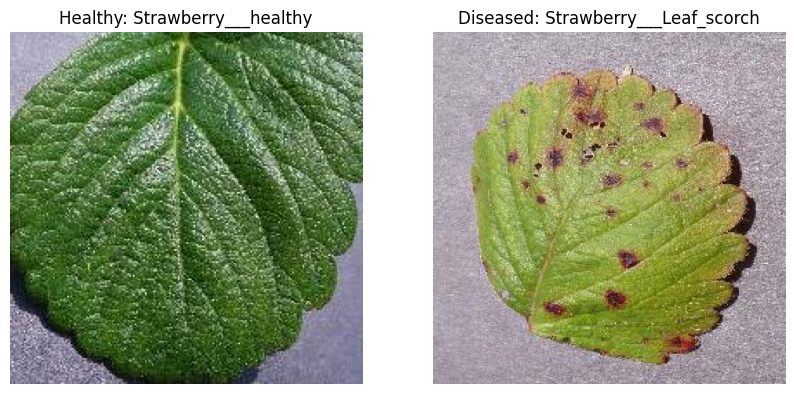

In [37]:
import os
import random
from tensorflow.keras.preprocessing import image

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  #batch dimension
    img_array = img_array / 255.0  # Normalizing the image
    return img_array

# one image from healthy class and one from diseased class
healthy_class = 'Strawberry___healthy'
diseased_class = 'Strawberry___Leaf_scorch'

# Get paths to both folders
healthy_folder = os.path.join(dataset_path, healthy_class)
diseased_folder = os.path.join(dataset_path, diseased_class)

# Selecting a random image from each folder
healthy_image = random.choice(os.listdir(healthy_folder))
diseased_image = random.choice(os.listdir(diseased_folder))

# Full paths to the selected images
healthy_img_path = os.path.join(healthy_folder, healthy_image)
diseased_img_path = os.path.join(diseased_folder, diseased_image)

# Load and preprocess both images from the folder
healthy_img = load_and_preprocess_image(healthy_img_path)
diseased_img = load_and_preprocess_image(diseased_img_path)

# Make predictions
healthy_prediction = model.predict(healthy_img)
diseased_prediction = model.predict(diseased_img)

# Get predicted class names
healthy_predicted_class_index = np.argmax(healthy_prediction[0])
diseased_predicted_class_index = np.argmax(diseased_prediction[0])

healthy_predicted_class_name = required_classes[healthy_predicted_class_index]
diseased_predicted_class_name = required_classes[diseased_predicted_class_index]

# Print the predictions
print(f"Predicted Class for Healthy Image: {healthy_predicted_class_name}")
print(f"Predicted Class for Diseased Image: {diseased_predicted_class_name}")

# Display both images with their predictions
plt.figure(figsize=(10, 5))

# Display healthy image
plt.subplot(1, 2, 1)
plt.imshow(image.load_img(healthy_img_path))
plt.title(f"Healthy: {healthy_predicted_class_name}")
plt.axis('off')

# Display diseased image
plt.subplot(1, 2, 2)
plt.imshow(image.load_img(diseased_img_path))
plt.title(f"Diseased: {diseased_predicted_class_name}")
plt.axis('off')

plt.show()
